In [8]:
!pip install pandas nltk textblob matplotlib seaborn

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


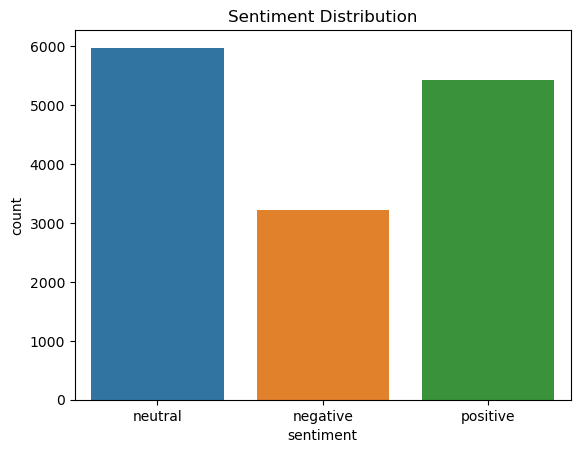

KeyError: 'created_at'

In [9]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load dataset
df = pd.read_csv("C:/Users/DELL/Documents/social media file/Tweets.csv")

# Assume the dataset has a column 'text' for the social media posts
# Text cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\W', ' ', text)      # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)     # Remove extra whitespace
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Remove stopwords and perform lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['cleaned_text'].apply(preprocess)

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['processed_text'].apply(get_sentiment)

# Visualization
# Sentiment Distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Time Series Analysis
df['date'] = pd.to_datetime(df['created_at']).dt.date  # Ensure you have a 'created_at' column in your dataset
sentiment_time_series = df.groupby(['date', 'sentiment']).size().unstack().fillna(0)
sentiment_time_series.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()